# KNN Classification

# Imports

In [106]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import importlib
import algorithms.k_nearest_neighbors
importlib.reload(algorithms.k_nearest_neighbors)

<module 'algorithms.k_nearest_neighbors' from '/home/neillucha/ml-algorithms-from-scratch/algorithms/k_nearest_neighbors.py'>

In [107]:
from tools.preprocessing import LabelEncoder, train_test_split
from tools.metrics import accuracy_score
from algorithms.k_nearest_neighbors import KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Preprocessing

### Getting Dataset

In [108]:
data = pd.read_csv('../data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
X = data.iloc[:,[2,3]].values
X

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5],
       [3.7, 1.5],
       [3.4, 1.6],
       [3. , 1.4],
       [3. , 1.1],
       [4. , 1.2],
       [4.4, 1.5],
       [3.9, 1.3],
       [3.5, 1.4],
       [3.8, 1.7],
       [3.8, 1.5],
       [3.4, 1.7],
       [3.7, 1.5],
       [3.6, 1. ],
       [3.3, 1.7],
       [3.4, 1.9],
       [3. , 1.6],
       [3.4, 1.6],
       [3.5, 1.5],
       [3.4, 1.4],
       [3.2, 1.6],
       [3.1, 1.6],
       [3.4, 1.5],
       [4.1, 1.5],
       [4.2, 1.4],
       [3.1, 1.5],
       [3.2, 1.2],
       [3.5, 1.3],
       [3.1, 1.5],
       [3. , 1.3],
       [3.4, 1.5],
       [3.5, 1.3],
       [2.3, 1.3],
       [3.2, 1.3],
       [3.5, 1.6],
       [3.8, 1.9],
       [3. , 1.4],
       [3.8, 1.6],
       [3.2, 1.4],
       [3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5],
       [3.1,

### Label Encoding Species Column

In [110]:
species = data.Species.values
le = LabelEncoder()
y = le.fit_transform(species)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [111]:
le.mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

### Performing Train Test Split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Visualization and Results

### Test Accuracy

In [113]:
classifier = KNN(k=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict_all(X_test)

In [114]:
accuracy_score(y_test, y_pred)

np.float64(0.9333333333333333)

### Visualizing Training Data

Text(0.5, 1.0, 'Petal Width v/s Petal Length (Train)')

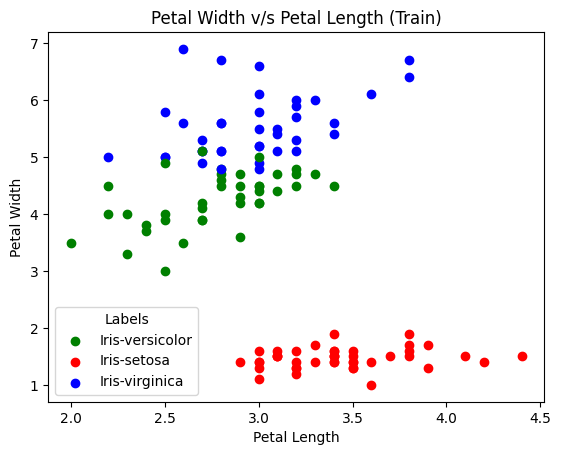

In [115]:
added_labels = []
colors = ['red', 'green', 'blue']

for idx, point in enumerate(X_train): 
    label = y_train[idx]
    if label not in added_labels:
        added_labels.append(label)
        plt.scatter(point[0], point[1], c=colors[label], label=le.inverse_mapping[label])
    else:
        plt.scatter(point[0], point[1], c=colors[label])
        
plt.legend(title='Labels')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Width v/s Petal Length (Train)')

### Color Map

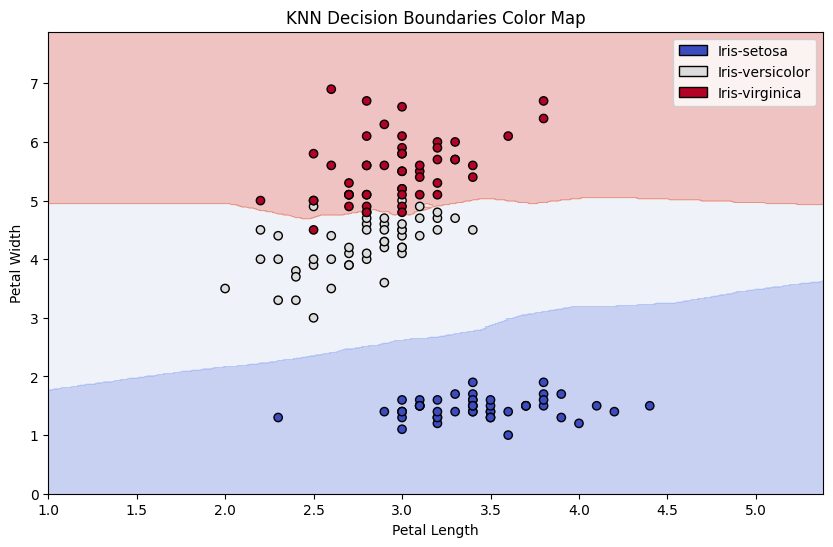

In [116]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict_all(grid_points)
Z = Z.reshape(xx.shape)


unique_labels = np.unique(y)
colors = [plt.cm.coolwarm(i / (len(unique_labels) - 1)) for i in unique_labels]
class_labels = [le.inverse_mapping[i] for i in unique_labels]

legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=class_labels[i])
                   for i in range(len(unique_labels))]

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("KNN Decision Boundaries Color Map")

plt.legend(handles=legend_elements)
plt.show()

